# Import necessary libraries

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
import shap


# Step 1: Load Dataset

In [ ]:
data = pd.read_csv('/content/user_behavior_dataset.csv')

# Step 2: Data Preprocessing and Cleaning

In [ ]:
if data.isnull().sum().any():
    print("Handling missing values...")
    data.fillna(method='ffill', inplace=True)  # Forward fill missing values


In [ ]:
# Encode categorical variables
label_encoder = LabelEncoder()
data['Device Model'] = label_encoder.fit_transform(data['Device Model'])
data['Operating System'] = label_encoder.fit_transform(data['Operating System'])
data['Gender'] = label_encoder.fit_transform(data['Gender'])

# Split the features and target variable
X = data.drop(['User ID', 'User Behavior Class'], axis=1)
y = data['User Behavior Class']

# Step 3: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Hyperparameter Tuning with GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

print("Starting GridSearch for hyperparameter tuning...")
grid_search = GridSearchCV(
    RandomForestClassifier(random_state=42),
    param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)
grid_search.fit(X_train, y_train)



Starting GridSearch for hyperparameter tuning...


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20, 30],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             scoring='accuracy')

In [ ]:
# Get the best parameters from the grid search
best_params = grid_search.best_params_
print(f"Best Parameters from GridSearchCV: {best_params}")

# Initialize and train the model with best parameters
rf_model = RandomForestClassifier(**best_params, random_state=42)
rf_model.fit(X_train, y_train)



Best Parameters from GridSearchCV: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 50}


RandomForestClassifier(n_estimators=50, random_state=42)

# Step 5: Evaluate the Model

In [ ]:
y_pred = rf_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy after Tuning: {accuracy * 100:.2f}%")

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("Classification Report:")
print(classification_report(y_test, y_pred))

Model Accuracy after Tuning: 100.00%
Confusion Matrix:
[[27  0  0  0  0]
 [ 0 29  0  0  0]
 [ 0  0 34  0  0]
 [ 0  0  0 27  0]
 [ 0  0  0  0 23]]
Classification Report:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        27
           2       1.00      1.00      1.00        29
           3       1.00      1.00      1.00        34
           4       1.00      1.00      1.00        27
           5       1.00      1.00      1.00        23

    accuracy                           1.00       140
   macro avg       1.00      1.00      1.00       140
weighted avg       1.00      1.00      1.00       140



# Step 6: Save the Trained Model

In [ ]:
joblib.dump(rf_model, 'user_behavior_rf_model.pkl')
print("Model saved successfully as 'user_behavior_rf_model.pkl'.")


Model saved successfully as 'user_behavior_rf_model.pkl'.


# Step 7: Load the Model (Optional)

In [ ]:
loaded_model = joblib.load('user_behavior_rf_model.pkl')
loaded_accuracy = accuracy_score(y_test, loaded_model.predict(X_test))
print(f"Loaded Model Accuracy: {loaded_accuracy * 100:.2f}%")

Loaded Model Accuracy: 100.00%


# Step 9: Feature Importance Visualization

<ipython-input-24-1bff349218dd>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importances, y=X.columns, palette="viridis")


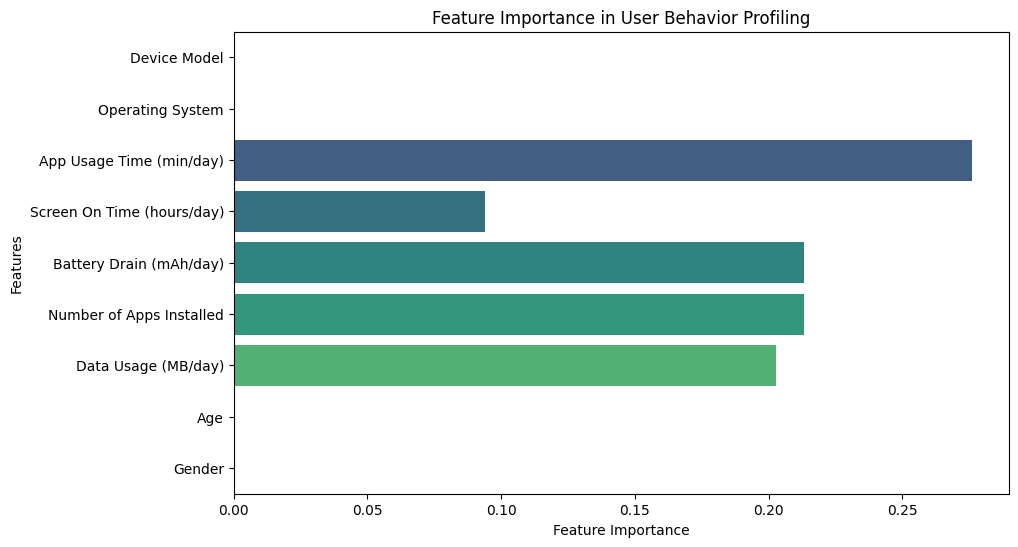

In [ ]:
feature_importances = rf_model.feature_importances_
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances, y=X.columns, palette="viridis")
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Feature Importance in User Behavior Profiling')
plt.show()


# Step 10: Advanced Recommendation System

In [ ]:
def recommend_apps(user_class):
    recommendations = {
        1: ['Instagram', 'YouTube', 'WhatsApp'],
        2: ['LinkedIn', 'Outlook', 'Zoom'],
        3: ['Netflix', 'Spotify', 'Reddit'],
        4: ['Google Maps', 'Uber', 'TripAdvisor']
    }
    return recommendations.get(user_class, ['No recommendations available'])

In [ ]:
# Predict and recommend apps for a sample user
sample_user_class = y_pred[0]
print(f"Recommended Apps for User Class {sample_user_class}: {recommend_apps(sample_user_class)}")

# Step 11: Streamlit Dashboard (Optional Step for Deployment)
# To deploy as a Streamlit app, save this section as `app.py`
# Run it using `streamlit run app.py`
"""
import streamlit as st
st.title("User Behavior Profiling and App Recommendation System")
uploaded_file = st.file_uploader("Upload your CSV file", type="csv")

if uploaded_file:
    data = pd.read_csv(uploaded_file)
    st.write(data.head())
    model = joblib.load('user_behavior_rf_model.pkl')
    predictions = model.predict(data.drop(['User ID', 'User Behavior Class'], axis=1))
    st.write(f"Predicted Classes: {predictions}")
    class_selection = st.selectbox("Select User Class", [1, 2, 3, 4])
    recommended_apps = recommend_apps(class_selection)
    st.write(f"Recommended Apps: {recommended_apps}")
"""

print("End of Program: Expert-Level User Profiling and Recommendation System Completed!")


Recommended Apps for User Class 4: ['Google Maps', 'Uber', 'TripAdvisor']
End of Program: Expert-Level User Profiling and Recommendation System Completed!
